# Social Media Use & Mental Health Survey 

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# --- Robust loader for CIUS PUMF (SAS) ---
from pathlib import Path
import pandas as pd

#Locate the .sas7bdat file anywhere under the project
root = Path.cwd()
candidates = list(root.rglob("cius_pumf.sas7bdat"))
print("Found SAS files:", [str(p.relative_to(root)) for p in candidates])

if not candidates:
    raise FileNotFoundError("Could not find 'cius_pumf.sas7bdat'. "
                            "Make sure it’s in Data/Data/Layouts/")

file_path = candidates[0]  # take the first match


Found SAS files: ['Data\\Data\\cius_pumf.sas7bdat']


In [3]:

cius = pd.read_sas(str(file_path), format="sas7bdat", encoding="latin1")

print("Loaded CIUS PUMF")



Loaded CIUS PUMF


In [4]:
print("Shape:", cius.shape)
print("First 20 columns:", list(cius.columns[:20]))


Shape: (25118, 1342)
First 20 columns: ['PUMFID', 'PROVINCE', 'LUC_RST', 'RRS_G12', 'AGE_GRP', 'GENDER', 'ABM', 'EMP', 'ED_10', 'EDU', 'AC_010A', 'AC_020A', 'AC_030A', 'AC_040A', 'AC_040B', 'AC_040C', 'AC_040D', 'AC_G040F', 'AC_G040H', 'AC_G040L']


In [5]:
cius.head()

,PUMFID,PROVINCE,LUC_RST,RRS_G12,AGE_GRP,GENDER,ABM,EMP,ED_10,EDU,...,WRPG991,WRPG992,WRPG993,WRPG994,WRPG995,WRPG996,WRPG997,WRPG998,WRPG999,WRPG1000
0,100000.0,35.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,...,0.850140,0.835827,943.351438,1063.999737,1211.319191,1102.319607,1134.841957,0.764067,0.901000,1238.133901
1,100001.0,24.0,1.0,2.0,3.0,2.0,2.0,1.0,2.0,3.0,...,2674.191778,0.906637,1232.584149,1180.189236,1162.019616,0.825672,2622.753088,1413.300686,1238.514401,1238.073837
2,100002.0,46.0,1.0,5.0,1.0,1.0,2.0,2.0,1.0,1.0,...,4.778324,2669.406260,3454.854131,3711.465912,4.863419,10567.939256,8.864064,3.770998,3392.246179,16573.401281
3,100003.0,59.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,1.0,...,591.713678,1484.953681,672.667980,543.881805,1117.693783,0.691681,743.797051,596.919337,539.860676,0.738150
4,100004.0,24.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,...,0.571829,0.738236,0.674246,569.744900,0.637382,696.952219,0.605033,553.936031,0.660384,0.755782


### Column Selection and Renaming
#### The original CIUS dataset contains 1,342 columns. To align this data with our survey, we will select only the 16 specific variables we need.

#### At the same time, we will rename these columns to more descriptive and "friendly" labels for easier analysis.

In [6]:
# 16 columns we need
cols16 = [
    "PROVINCE", "AGE_GRP", "GENDER", "EDU", "EMP", "HINCQUIN", "WTPG",
    "TS_010A", "TS_020A", "UI_110A", "UI_110B", "UI_110C",
    "DS_070A", "DS_070B", "GHCOMP", "ONL_SHOP"
]

# Check which ones exist in your CIUS file
available_cols = [c for c in cols16 if c in cius.columns]
missing_cols = [c for c in cols16 if c not in cius.columns]

print("Found columns:", available_cols)
print("Missing columns:", missing_cols)



Found columns: ['PROVINCE', 'AGE_GRP', 'GENDER', 'EDU', 'EMP', 'HINCQUIN', 'WTPG', 'TS_010A', 'TS_020A', 'UI_110A', 'UI_110B', 'UI_110C', 'DS_070A', 'DS_070B', 'GHCOMP', 'ONL_SHOP']
Missing columns: []


In [7]:
column_mapping = {
    "PROVINCE": "Province",
    "AGE_GRP": "Age",
    "GENDER": "Gender",
    "EDU": "Education",
    "EMP": "Employment",
    "HINCQUIN": "Income_Group",
    "WTPG": "Weight",

    # TS_* are about relationships & online communication
    "TS_010A": "Rel_Satisfaction",          # satisfaction with relationships (friends)
    "TS_020A": "Online_Contact_Freq",       # how often use internet to communicate with friends

    # UI_110* are *effects* of online use
    "UI_110A": "SM_Interfere_Rel",          # Does online use interfere with relationships?
    "UI_110B": "SM_Interfere_Life",         # Interfere with other aspects of life?
    "UI_110C": "SM_Anxious_Envious",        # Make you feel anxious / depressed / envious?

    # DS_070* are *AI awareness*, not stress/sleep
    "DS_070A": "SM_AI_Chatbot",             # Ever noticed AI in chatbots?
    "DS_070B": "SM_AI_Email",               # Ever noticed AI in emails?

    # Household composition
    "GHCOMP": "Household_Type",

    # Online shopping
    "ONL_SHOP": "Online_Shopping"
}

cius = cius.rename(columns=column_mapping)


In [8]:
cius.columns

Index(['PUMFID', 'Province', 'LUC_RST', 'RRS_G12', 'Age', 'Gender', 'ABM',
       'Employment', 'ED_10', 'Education',
       ...
       'WRPG991', 'WRPG992', 'WRPG993', 'WRPG994', 'WRPG995', 'WRPG996',
       'WRPG997', 'WRPG998', 'WRPG999', 'WRPG1000'],
      dtype='object', length=1342)

In [9]:
valid_ranges = {
    "Province": {10, 11, 12, 13, 24, 35, 46, 47, 48, 59},
    "Age": {1, 2, 3, 4, 5, 6},
    "Gender": {1, 2},
    "Education": {1, 2, 3},
    "Employment": {1, 2},
    "Income_Group": {1, 2, 3, 4, 5},

    # Rel_Satisfaction 1–5 only, drop 6/7/8/9
    "Rel_Satisfaction": {1, 2, 3, 4, 5},

    # Online_Contact_Freq 01–06 only, drop 07/96/97/98/99
    "Online_Contact_Freq": {1, 2, 3, 4, 5, 6},

    # All these are Yes / No (1/2). 6/7/8/9 = missing / DK / refusal
    "SM_Interfere_Rel": {1, 2},
    "SM_Interfere_Life": {1, 2},
    "SM_Anxious_Envious": {1, 2},
    "SM_AI_Chatbot": {1, 2},
    "SM_AI_Email": {1, 2},

    # Household type 1–4 (skip 6/7/8/9)
    "Household_Type": {1, 2, 3, 4},

    # Online shopping 1,2,3,4,5 in CIUS, but you probably only want 1/2
    "Online_Shopping": {1, 2}
}

for col, allowed in valid_ranges.items():
    cius.loc[~cius[col].isin(allowed), col] = pd.NA

# Optionally drop rows with any NA:
# cius_clean = cius.dropna().reset_index(drop=True)
# or keep them and handle missing in analysis


#### Recoding Column Values
#### To make the data easier to understand, we will convert the numeric codes in our categorical columns into human-readable text values.

#### We will create a separate mapping dictionary for each column. Then, we'll use the .map() method to apply these transformations, changing codes into descriptive labels 

In [10]:
label_mappings = {
    "Province": {
        10: "Newfoundland and Labrador",
        11: "Prince Edward Island",
        12: "Nova Scotia",
        13: "New Brunswick",
        24: "Quebec",
        35: "Ontario",
        46: "Manitoba",
        47: "Saskatchewan",
        48: "Alberta",
        59: "British Columbia"
    },
    "Age": {
        1: "15–24 years",
        2: "25–34 years",
        3: "35–44 years",
        4: "45–54 years",
        5: "55–64 years",
        6: "65 years and over"
    },
    "Gender": {
        1: "Male",
        2: "Female"
    },
    "Education": {
        1: "High school or less",
        2: "Some post-secondary (incl. certificate)",
        3: "University degree"
    },
    "Employment": {
        1: "Employed",
        2: "Not employed"
    },
    "Income_Group": {
        1: "≤ $42,256",
        2: "$42,257 – $72,366",
        3: "$72,367 – $107,480",
        4: "$107,481 – $163,750",
        5: "≥ $163,751"
    },
    "Rel_Satisfaction": {
        1: "Completely dissatisfied",
        2: "Somewhat dissatisfied",
        3: "Neutral",
        4: "Somewhat satisfied",
        5: "Completely satisfied"
    },
    "Online_Contact_Freq": {
        1: "Everyday",
        2: "A few times a week",
        3: "Once a week",
        4: "2–3 times a month",
        5: "Once a month",
        6: "Not in the past month"
    },
    "Online_Shopping": {
        1: "Online shopper (≥ $1)",
        2: "Did not shop online"
    }
}

for col, mapping in label_mappings.items():
    cius[col] = cius[col].map(mapping)


In [11]:
yn_map = {1: "Yes", 2: "No"}

for col in ["SM_Interfere_Rel", "SM_Interfere_Life",
            "SM_Anxious_Envious", "SM_AI_Chatbot", "SM_AI_Email"]:
    cius[col] = cius[col].map(yn_map)


In [12]:
hh_map = {
    1: "Family with children <18",
    2: "Family without children <18",
    3: "Single-person household",
    4: "Other household type"
}

cius["Household_Type"] = cius["Household_Type"].map(hh_map)


In [13]:
cius.head()


,PUMFID,Province,LUC_RST,RRS_G12,Age,Gender,ABM,Employment,ED_10,Education,...,WRPG991,WRPG992,WRPG993,WRPG994,WRPG995,WRPG996,WRPG997,WRPG998,WRPG999,WRPG1000
0,100000.0,Ontario,1.0,1.0,65 years and over,Female,2.0,Not employed,2.0,Some post-secondary (incl. certificate),...,0.850140,0.835827,943.351438,1063.999737,1211.319191,1102.319607,1134.841957,0.764067,0.901000,1238.133901
1,100001.0,Quebec,1.0,2.0,35–44 years,Female,2.0,Employed,2.0,University degree,...,2674.191778,0.906637,1232.584149,1180.189236,1162.019616,0.825672,2622.753088,1413.300686,1238.514401,1238.073837
2,100002.0,Manitoba,1.0,5.0,15–24 years,Male,2.0,Not employed,1.0,High school or less,...,4.778324,2669.406260,3454.854131,3711.465912,4.863419,10567.939256,8.864064,3.770998,3392.246179,16573.401281
3,100003.0,British Columbia,1.0,1.0,65 years and over,Female,2.0,Not employed,2.0,High school or less,...,591.713678,1484.953681,672.667980,543.881805,1117.693783,0.691681,743.797051,596.919337,539.860676,0.738150
4,100004.0,Quebec,1.0,2.0,55–64 years,Male,2.0,Not employed,2.0,Some post-secondary (incl. certificate),...,0.571829,0.738236,0.674246,569.744900,0.637382,696.952219,0.605033,553.936031,0.660384,0.755782


In [14]:
cius.dtypes


PUMFID      float64
Province     object
LUC_RST     float64
RRS_G12     float64
Age          object
             ...   
WRPG996     float64
WRPG997     float64
WRPG998     float64
WRPG999     float64
WRPG1000    float64
Length: 1342, dtype: object

In [15]:
final_cols = [
    "Province",
    "Age",
    "Gender",
    "Education",
    "Employment",
    "Income_Group",
    "Weight",

    "Rel_Satisfaction",       # TS_010A
    "Online_Contact_Freq",    # TS_020A

    "SM_Interfere_Rel",       # UI_110A
    "SM_Interfere_Life",      # UI_110B
    "SM_Anxious_Envious",     # UI_110C

    "SM_AI_Chatbot",          # DS_070A
    "SM_AI_Email",            # DS_070B

    "Household_Type",         # GHCOMP
    "Online_Shopping"         # ONL_SHOP
]


In [16]:
cius_16 = cius[final_cols].copy()


In [17]:
cius_16.to_csv("CIUS_SocialMedia_Clean_Labeled.csv", index=False)
print("Saved file with shape:", cius_16.shape)


Saved file with shape: (25118, 16)


In [18]:
cius_16.head()

,Province,Age,Gender,Education,Employment,Income_Group,Weight,Rel_Satisfaction,Online_Contact_Freq,SM_Interfere_Rel,SM_Interfere_Life,SM_Anxious_Envious,SM_AI_Chatbot,SM_AI_Email,Household_Type,Online_Shopping
0,Ontario,65 years and over,Female,Some post-secondary (incl. certificate),Not employed,"$42,257 – $72,366",1091.470037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single-person household,NaN
1,Quebec,35–44 years,Female,University degree,Employed,"$42,257 – $72,366",1264.083653,Completely satisfied,Everyday,No,No,No,Yes,Yes,Family with children <18,Online shopper (≥ $1)
2,Manitoba,15–24 years,Male,High school or less,Not employed,"$42,257 – $72,366",3413.046802,Completely satisfied,Everyday,No,No,No,No,No,Family with children <18,Did not shop online
3,British Columbia,65 years and over,Female,High school or less,Not employed,"$72,367 – $107,480",627.395486,Completely satisfied,NaN,No,No,No,No,No,Single-person household,Did not shop online
4,Quebec,55–64 years,Male,Some post-secondary (incl. certificate),Not employed,"$107,481 – $163,750",585.544542,Completely satisfied,A few times a week,No,No,No,Yes,Yes,Family without children <18,Online shopper (≥ $1)


In [19]:
cius_16.isnull().sum()

Province                  0
Age                       3
Gender                    0
Education              1370
Employment             1421
Income_Group              0
Weight                    0
Rel_Satisfaction       2475
Online_Contact_Freq    4179
SM_Interfere_Rel       2231
SM_Interfere_Life      2231
SM_Anxious_Envious     2231
SM_AI_Chatbot          3016
SM_AI_Email            3016
Household_Type          731
Online_Shopping        2467
dtype: int64

In [20]:
not_asked_cols = [
    "Rel_Satisfaction", "Online_Contact_Freq",
    "SM_Interfere_Rel", "SM_Interfere_Life", "SM_Anxious_Envious",
    "SM_AI_Chatbot", "SM_AI_Email",
    "Household_Type", "Online_Shopping"
]

for col in not_asked_cols:
    cius_16[col] = cius_16[col].fillna("Not asked")

In [21]:
# Fix true missing demographic responses
cius_16["Age"] = cius_16["Age"].fillna("Unknown")
cius_16["Education"] = cius_16["Education"].fillna("Unknown")
cius_16["Employment"] = cius_16["Employment"].fillna("Unknown")


Not asked” = the respondent was not supposed to answer that question due to survey design.

It does NOT mean:

missing

null

skipped

error

drop row

It means:

Survey logic instructed: do not ask this person.

In [22]:
cius_16.isnull().sum()


Province               0
Age                    0
Gender                 0
Education              0
Employment             0
Income_Group           0
Weight                 0
Rel_Satisfaction       0
Online_Contact_Freq    0
SM_Interfere_Rel       0
SM_Interfere_Life      0
SM_Anxious_Envious     0
SM_AI_Chatbot          0
SM_AI_Email            0
Household_Type         0
Online_Shopping        0
dtype: int64

For skip pattern variables

(relationship satisfaction, online frequency, AI chatbot/email, stress/anxiety, online shopping)

→ "Not asked" is correct.

For demographic variables

(Age, Education, Employment)

→ Users refused or skipped → these are true missing values
→ Use "Unknown" so Tableau groups them, not drops them.

In [23]:
cius_df = cius_16.copy()
cius_df.shape

(25118, 16)

In [24]:
cius_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25118 entries, 0 to 25117
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Province             25118 non-null  object 
 1   Age                  25118 non-null  object 
 2   Gender               25118 non-null  object 
 3   Education            25118 non-null  object 
 4   Employment           25118 non-null  object 
 5   Income_Group         25118 non-null  object 
 6   Weight               25118 non-null  float64
 7   Rel_Satisfaction     25118 non-null  object 
 8   Online_Contact_Freq  25118 non-null  object 
 9   SM_Interfere_Rel     25118 non-null  object 
 10  SM_Interfere_Life    25118 non-null  object 
 11  SM_Anxious_Envious   25118 non-null  object 
 12  SM_AI_Chatbot        25118 non-null  object 
 13  SM_AI_Email          25118 non-null  object 
 14  Household_Type       25118 non-null  object 
 15  Online_Shopping      25118 non-null 

In [25]:
cius_df.isnull().sum()

Province               0
Age                    0
Gender                 0
Education              0
Employment             0
Income_Group           0
Weight                 0
Rel_Satisfaction       0
Online_Contact_Freq    0
SM_Interfere_Rel       0
SM_Interfere_Life      0
SM_Anxious_Envious     0
SM_AI_Chatbot          0
SM_AI_Email            0
Household_Type         0
Online_Shopping        0
dtype: int64

In [26]:
cius_df['Province'].value_counts()

Province
Ontario                      6462
Quebec                       5665
British Columbia             3371
Alberta                      2016
Saskatchewan                 1532
Manitoba                     1496
Nova Scotia                  1308
Newfoundland and Labrador    1191
Prince Edward Island         1064
New Brunswick                1013
Name: count, dtype: int64

In [27]:
cius_df['Weight'].value_counts()

Weight
851.205191     93
795.635082     84
1028.210795    78
1083.542252    76
1225.328538    67
               ..
293.448553      1
2060.625280     1
459.957711      1
247.583062      1
388.653684      1
Name: count, Length: 2953, dtype: int64

In [28]:
cius_df['Employment'].value_counts()

Employment
Employed        13197
Not employed    10500
Unknown          1421
Name: count, dtype: int64

In [29]:
cius_df.columns

Index(['Province', 'Age', 'Gender', 'Education', 'Employment', 'Income_Group',
       'Weight', 'Rel_Satisfaction', 'Online_Contact_Freq', 'SM_Interfere_Rel',
       'SM_Interfere_Life', 'SM_Anxious_Envious', 'SM_AI_Chatbot',
       'SM_AI_Email', 'Household_Type', 'Online_Shopping'],
      dtype='object')

In [30]:
cius_df.head()

,Province,Age,Gender,Education,Employment,Income_Group,Weight,Rel_Satisfaction,Online_Contact_Freq,SM_Interfere_Rel,SM_Interfere_Life,SM_Anxious_Envious,SM_AI_Chatbot,SM_AI_Email,Household_Type,Online_Shopping
0,Ontario,65 years and over,Female,Some post-secondary (incl. certificate),Not employed,"$42,257 – $72,366",1091.470037,Not asked,Not asked,Not asked,Not asked,Not asked,Not asked,Not asked,Single-person household,Not asked
1,Quebec,35–44 years,Female,University degree,Employed,"$42,257 – $72,366",1264.083653,Completely satisfied,Everyday,No,No,No,Yes,Yes,Family with children <18,Online shopper (≥ $1)
2,Manitoba,15–24 years,Male,High school or less,Not employed,"$42,257 – $72,366",3413.046802,Completely satisfied,Everyday,No,No,No,No,No,Family with children <18,Did not shop online
3,British Columbia,65 years and over,Female,High school or less,Not employed,"$72,367 – $107,480",627.395486,Completely satisfied,Not asked,No,No,No,No,No,Single-person household,Did not shop online
4,Quebec,55–64 years,Male,Some post-secondary (incl. certificate),Not employed,"$107,481 – $163,750",585.544542,Completely satisfied,A few times a week,No,No,No,Yes,Yes,Family without children <18,Online shopper (≥ $1)


In [31]:
cius_df['Age'].value_counts()

Age
65 years and over    8346
55–64 years          5190
35–44 years          4022
45–54 years          3875
25–34 years          2756
15–24 years           926
Unknown                 3
Name: count, dtype: int64

In [32]:
cius_df['Rel_Satisfaction'].value_counts()

Rel_Satisfaction
Completely satisfied       10532
Somewhat satisfied          7616
Neutral                     3514
Not asked                   2475
Somewhat dissatisfied        643
Completely dissatisfied      338
Name: count, dtype: int64

#### Quick overview

In [33]:
print("rows, cols : ", cius_df.shape)
display(cius_df.head(10))


rows, cols :  (25118, 16)


,Province,Age,Gender,Education,Employment,Income_Group,Weight,Rel_Satisfaction,Online_Contact_Freq,SM_Interfere_Rel,SM_Interfere_Life,SM_Anxious_Envious,SM_AI_Chatbot,SM_AI_Email,Household_Type,Online_Shopping
0,Ontario,65 years and over,Female,Some post-secondary (incl. certificate),Not employed,"$42,257 – $72,366",1091.470037,Not asked,Not asked,Not asked,Not asked,Not asked,Not asked,Not asked,Single-person household,Not asked
1,Quebec,35–44 years,Female,University degree,Employed,"$42,257 – $72,366",1264.083653,Completely satisfied,Everyday,No,No,No,Yes,Yes,Family with children <18,Online shopper (≥ $1)
2,Manitoba,15–24 years,Male,High school or less,Not employed,"$42,257 – $72,366",3413.046802,Completely satisfied,Everyday,No,No,No,No,No,Family with children <18,Did not shop online
3,British Columbia,65 years and over,Female,High school or less,Not employed,"$72,367 – $107,480",627.395486,Completely satisfied,Not asked,No,No,No,No,No,Single-person household,Did not shop online
4,Quebec,55–64 years,Male,Some post-secondary (incl. certificate),Not employed,"$107,481 – $163,750",585.544542,Completely satisfied,A few times a week,No,No,No,Yes,Yes,Family without children <18,Online shopper (≥ $1)
5,Saskatchewan,45–54 years,Male,High school or less,Employed,"$42,257 – $72,366",378.876698,Neutral,Not asked,No,No,No,No,No,Family without children <18,Did not shop online
6,New Brunswick,65 years and over,Male,Some post-secondary (incl. certificate),Not employed,"$42,257 – $72,366",433.002600,Completely satisfied,A few times a week,No,No,No,No,No,Family without children <18,Did not shop online
7,Quebec,25–34 years,Female,Some post-secondary (incl. certificate),Employed,"$42,257 – $72,366",4060.051301,Neutral,Everyday,No,No,No,Yes,No,Single-person household,Did not shop online
8,Quebec,45–54 years,Male,Some post-secondary (incl. certificate),Employed,"≥ $163,751",762.357914,Somewhat satisfied,Once a week,No,No,No,No,No,Family without children <18,Online shopper (≥ $1)
9,Alberta,65 years and over,Male,Some post-secondary (incl. certificate),Not employed,"≥ $163,751",915.245450,Completely satisfied,Everyday,No,No,No,No,No,Family without children <18,Online shopper (≥ $1)


In [34]:
print("unique values per column:\n",cius_df.nunique())



unique values per column:
 Province                 10
Age                       7
Gender                    2
Education                 4
Employment                3
Income_Group              5
Weight                 2953
Rel_Satisfaction          6
Online_Contact_Freq       7
SM_Interfere_Rel          3
SM_Interfere_Life         3
SM_Anxious_Envious        3
SM_AI_Chatbot             3
SM_AI_Email               3
Household_Type            4
Online_Shopping           3
dtype: int64


In [35]:
print("column types:\n",cius_df.dtypes)


column types:
 Province                object
Age                     object
Gender                  object
Education               object
Employment              object
Income_Group            object
Weight                 float64
Rel_Satisfaction        object
Online_Contact_Freq     object
SM_Interfere_Rel        object
SM_Interfere_Life       object
SM_Anxious_Envious      object
SM_AI_Chatbot           object
SM_AI_Email             object
Household_Type          object
Online_Shopping         object
dtype: object


#### Missing Value

In [36]:
mv = cius_df.isna().sum().to_frame("missing")
mv["percent"] = (mv["missing"] / len(cius_df) * 100).round(2)
mv.sort_values("percent", ascending=False)


,missing,percent
Province,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
Employment,0,0.0
Income_Group,0,0.0
Weight,0,0.0
Rel_Satisfaction,0,0.0
Online_Contact_Freq,0,0.0
SM_Interfere_Rel,0,0.0


#### frequency tables for key demographics 

In [37]:
for col in ["Province", "Age", "Gender", "Education", "Employment", "Income_Group"]:
    print(f"\n=== {col} ===")
    vc = cius_df[col].value_counts(dropna=False)
    pct = (vc / vc.sum() * 100).round(1)
    display(pd.DataFrame({"count": vc, "%": pct}))



=== Province ===


,count,%
Province,,
Ontario,6462,25.7
Quebec,5665,22.6
British Columbia,3371,13.4
Alberta,2016,8.0
Saskatchewan,1532,6.1
Manitoba,1496,6.0
Nova Scotia,1308,5.2
Newfoundland and Labrador,1191,4.7
Prince Edward Island,1064,4.2



=== Age ===


,count,%
Age,,
65 years and over,8346,33.2
55–64 years,5190,20.7
35–44 years,4022,16.0
45–54 years,3875,15.4
25–34 years,2756,11.0
15–24 years,926,3.7
Unknown,3,0.0



=== Gender ===


,count,%
Gender,,
Female,13260,52.8
Male,11858,47.2



=== Education ===


,count,%
Education,,
Some post-secondary (incl. certificate),8327,33.2
University degree,8235,32.8
High school or less,7186,28.6
Unknown,1370,5.5



=== Employment ===


,count,%
Employment,,
Employed,13197,52.5
Not employed,10500,41.8
Unknown,1421,5.7



=== Income_Group ===


,count,%
Income_Group,,
"$42,257 – $72,366",5238,20.9
"$72,367 – $107,480",5190,20.7
"$107,481 – $163,750",5178,20.6
"≥ $163,751",4916,19.6
"≤ $42,256",4596,18.3


# EDA

#### Older Canadians are well represented in this dataset, so your social media and mental health patterns will reflect older demographic behavior more strongly.
#### When we later compare stress, sleep,Social Media habits by gender, we’ll keep in mind that the dataset has more women, which might slightly bias averages

----- Province -----
Province
Ontario                      6462
Quebec                       5665
British Columbia             3371
Alberta                      2016
Saskatchewan                 1532
Manitoba                     1496
Nova Scotia                  1308
Newfoundland and Labrador    1191
Prince Edward Island         1064
New Brunswick                1013
Name: count, dtype: int64


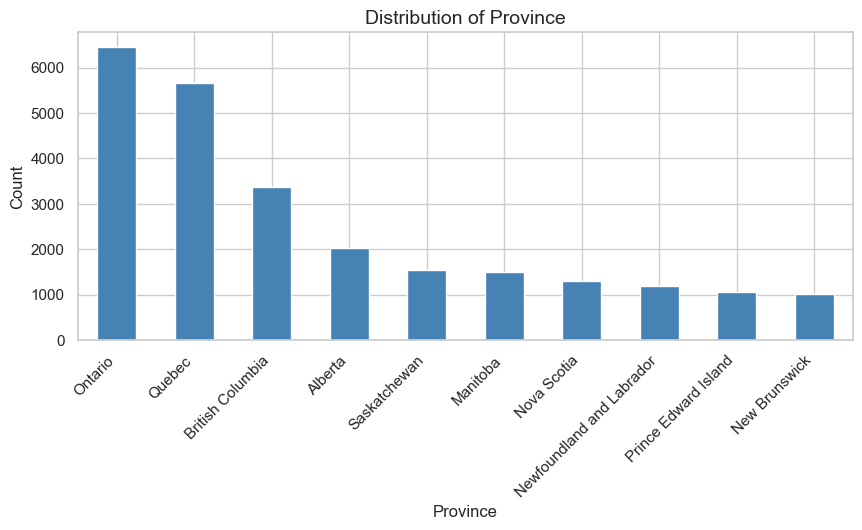

----- Age -----
Age
65 years and over    8346
55–64 years          5190
35–44 years          4022
45–54 years          3875
25–34 years          2756
15–24 years           926
Unknown                 3
Name: count, dtype: int64


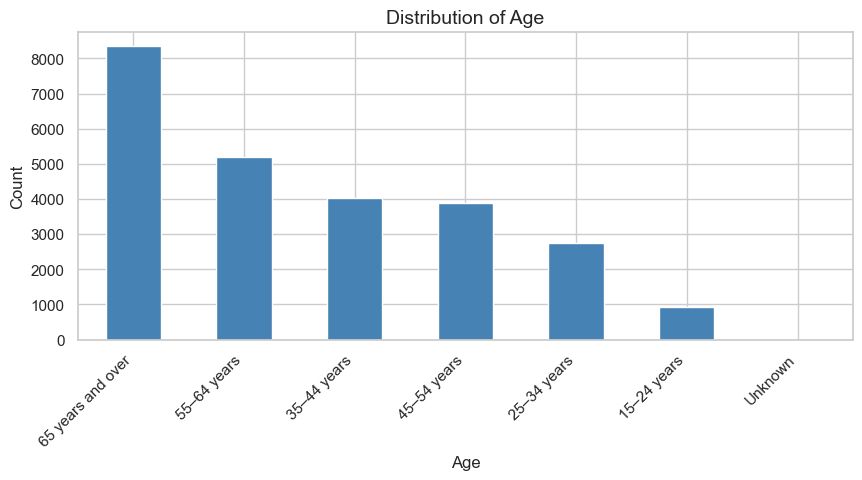

----- Gender -----
Gender
Female    13260
Male      11858
Name: count, dtype: int64


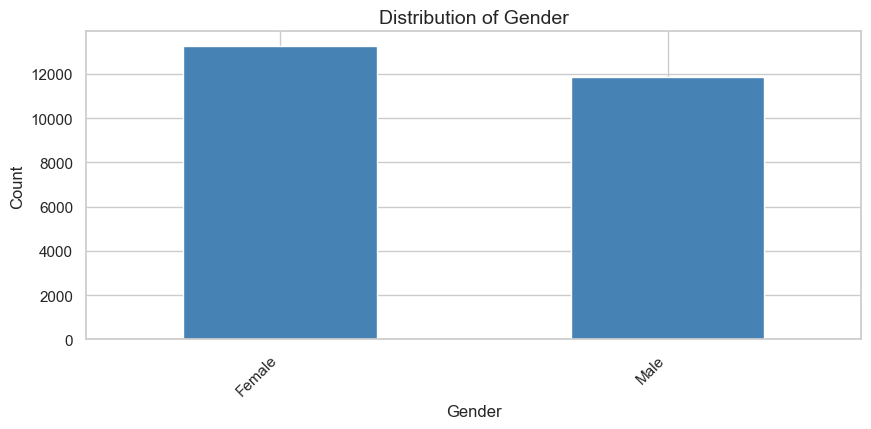

----- Education -----
Education
Some post-secondary (incl. certificate)    8327
University degree                          8235
High school or less                        7186
Unknown                                    1370
Name: count, dtype: int64


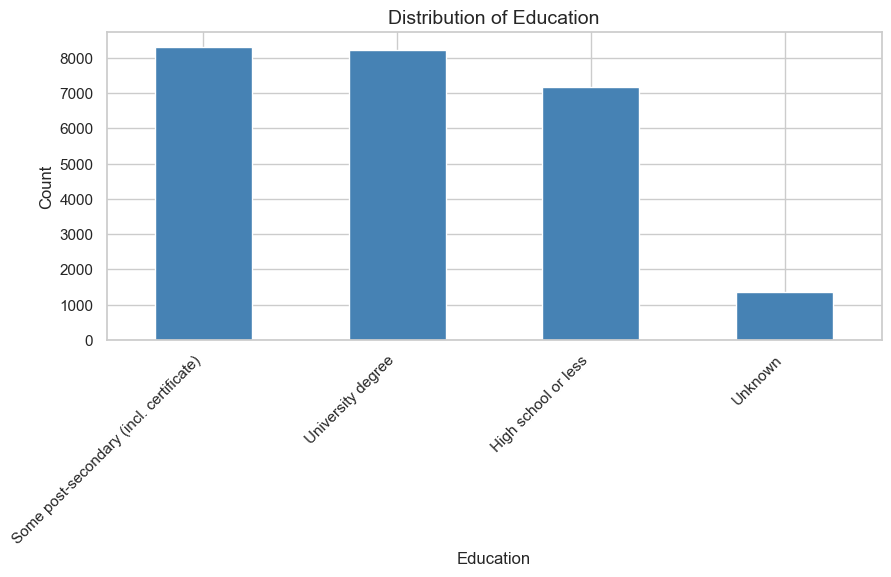

----- Employment -----
Employment
Employed        13197
Not employed    10500
Unknown          1421
Name: count, dtype: int64


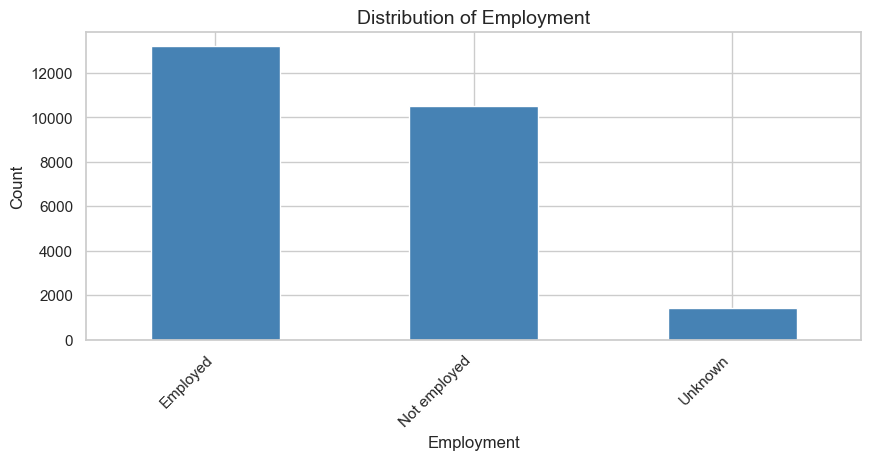

----- Income_Group -----
Income_Group
$42,257 – $72,366      5238
$72,367 – $107,480     5190
$107,481 – $163,750    5178
≥ $163,751             4916
≤ $42,256              4596
Name: count, dtype: int64


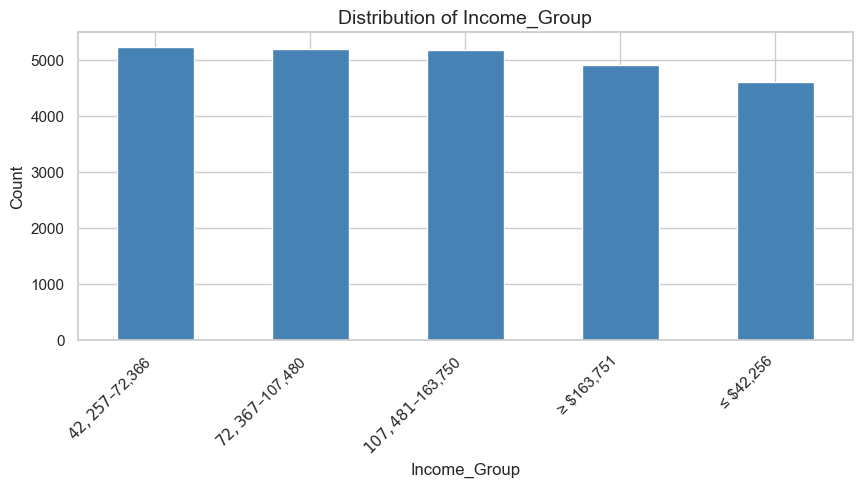

----- Rel_Satisfaction -----
Rel_Satisfaction
Completely satisfied       10532
Somewhat satisfied          7616
Neutral                     3514
Not asked                   2475
Somewhat dissatisfied        643
Completely dissatisfied      338
Name: count, dtype: int64


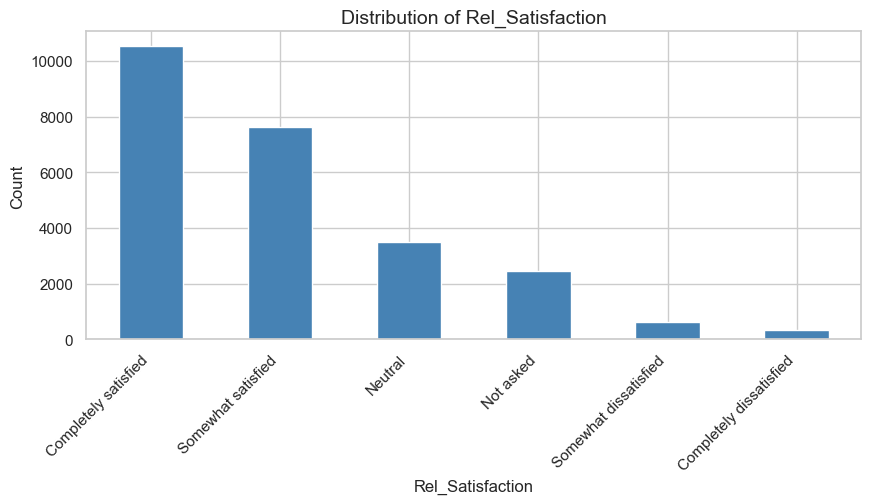

----- Online_Contact_Freq -----
Online_Contact_Freq
Everyday                 9924
A few times a week       6439
Not asked                4179
2–3 times a month        1540
Once a week              1476
Not in the past month     861
Once a month              699
Name: count, dtype: int64


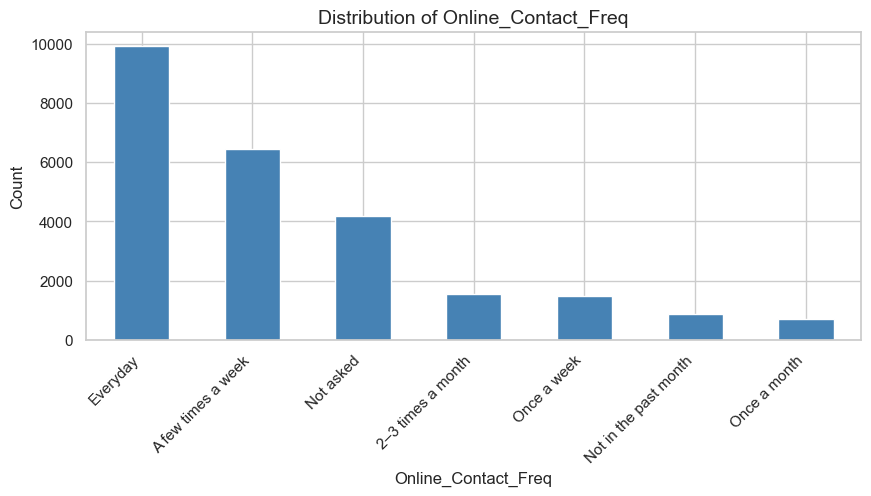

----- SM_Interfere_Rel -----
SM_Interfere_Rel
No           21315
Not asked     2231
Yes           1572
Name: count, dtype: int64


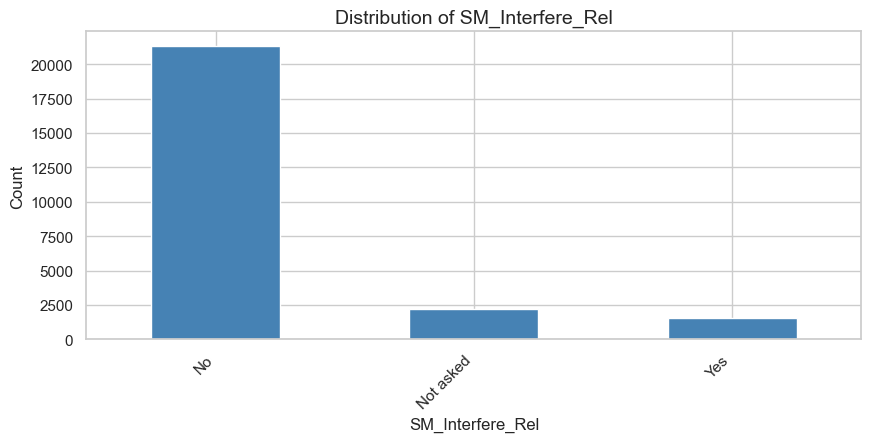

----- SM_Interfere_Life -----
SM_Interfere_Life
No           18429
Yes           4458
Not asked     2231
Name: count, dtype: int64


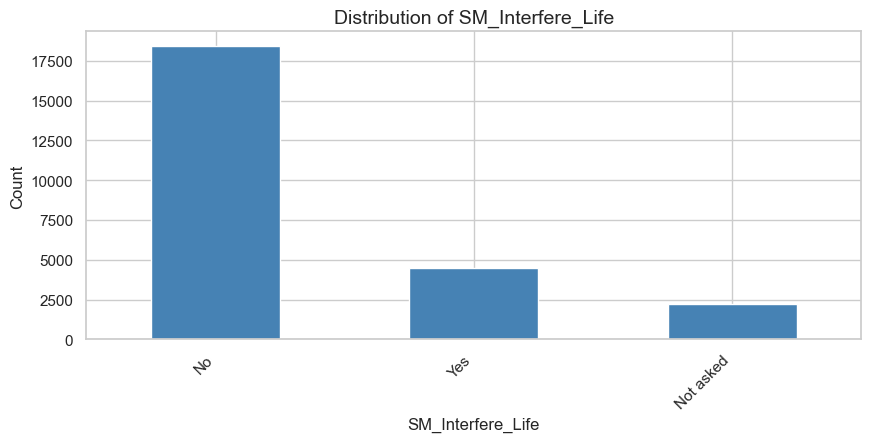

----- SM_Anxious_Envious -----
SM_Anxious_Envious
No           18750
Yes           4137
Not asked     2231
Name: count, dtype: int64


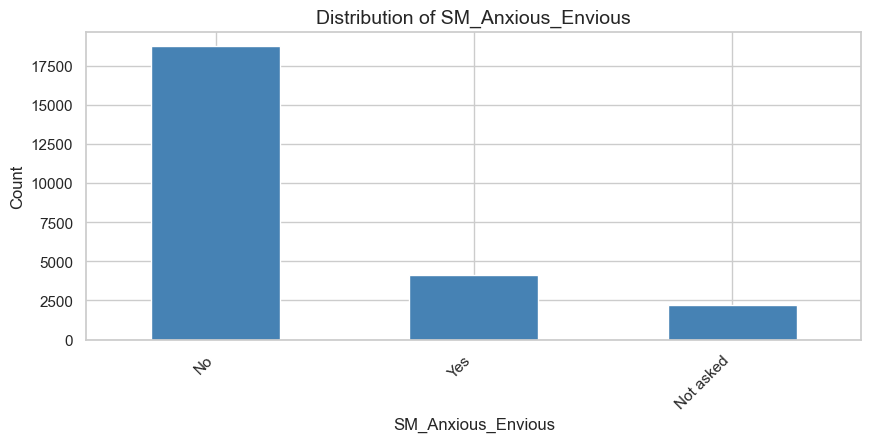

----- SM_AI_Chatbot -----
SM_AI_Chatbot
No           12539
Yes           9563
Not asked     3016
Name: count, dtype: int64


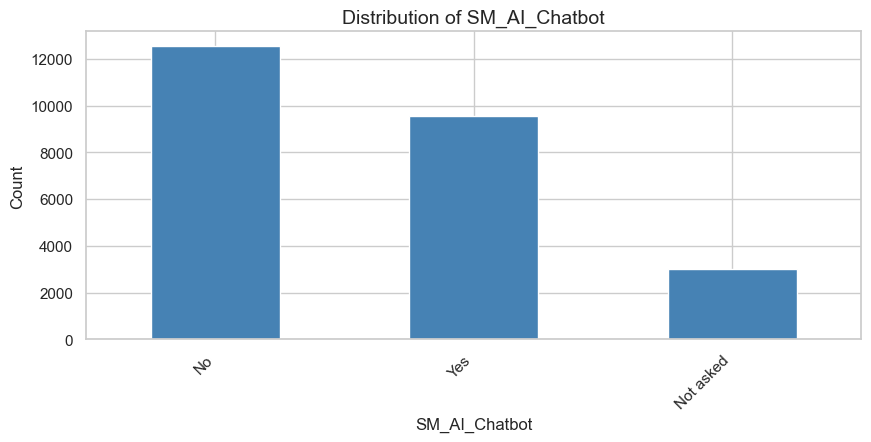

----- SM_AI_Email -----
SM_AI_Email
No           12059
Yes          10043
Not asked     3016
Name: count, dtype: int64


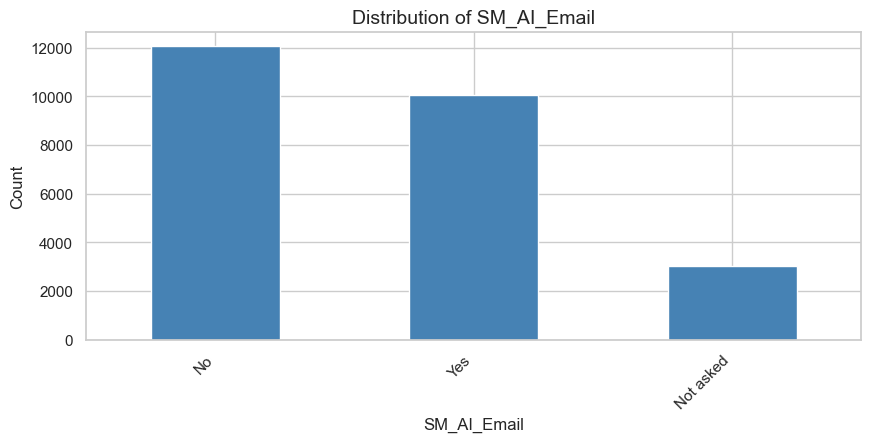

----- Household_Type -----
Household_Type
Family without children <18    11497
Single-person household         7389
Family with children <18        5501
Not asked                        731
Name: count, dtype: int64


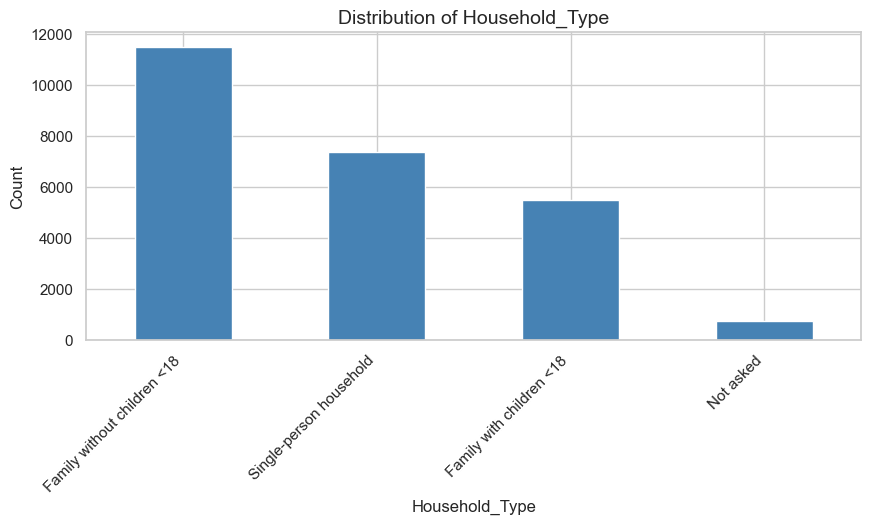

----- Online_Shopping -----
Online_Shopping
Online shopper (≥ $1)    17175
Did not shop online       5476
Not asked                 2467
Name: count, dtype: int64


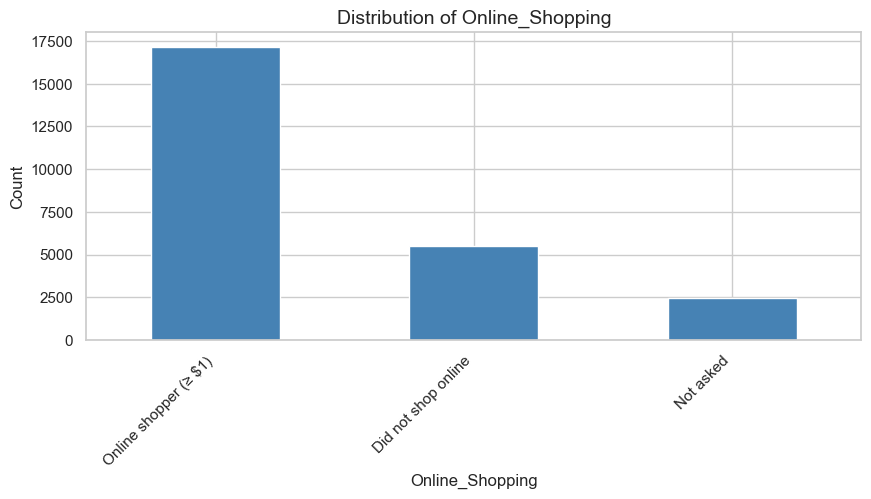

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# List of final columns for univariate EDA
cols = [
    "Province", "Age", "Gender", "Education", "Employment",
    "Income_Group", 
    "Rel_Satisfaction", "Online_Contact_Freq",
    "SM_Interfere_Rel", "SM_Interfere_Life", "SM_Anxious_Envious",
    "SM_AI_Chatbot", "SM_AI_Email",
    "Household_Type", "Online_Shopping"
]


# Function to plot bar charts for categorical variables
def plot_bar(col):
    plt.figure(figsize=(10, 4))
    cius_16[col].value_counts().plot(kind='bar', color='steelblue')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.show()


# UNIVARIATE ANALYSIS
for col in cols:
    print(f"----- {col} -----")
    print(cius_16[col].value_counts())
    plot_bar(col)


`1. Province`  
>  Shows which provinces had the most respondents.
- Ontario & Quebec dominate (largest population), followed by BC & Alberta.

`2. Age`
> Distribution of respondents across 6 age groups.
- Older groups (55–64 & 65+) have the highest representation.

`3. Gender`
> Male / Female.
- Slight female majority (around ~52%).

`4. Education`
> Three categories + Unknown.
- Largest group: University graduates.
- Second: Some post-secondary.

`5. Employment`
> Employed / Not employed / Unknown.
- Most respondents are employed.

`6. Income_Group`
> Income quintiles.
- Even distribution (by design of quintile sampling).


`7. Rel_Satisfaction`
> (1–5 satisfaction with relationships)
- Most respondents are “Somewhat satisfied” or “Completely satisfied”.

`8. Online_Contact_Freq`
> How often they use the internet to contact friends.
- Biggest groups:
- ✔ Everyday
- ✔ A few times a week

This aligns with modern digital behavior.

`9. SM_Interfere_Rel`
> Does online use interfere with relationships?
- Majority say No, a minority says Yes.

`10. SM_Interfere_Life`
> Does online use interfere with life?
- Most respondents say No — normal finding.

`11. SM_Anxious_Envious`
> Does online use cause anxiety / envy / depression?
- Still mostly No, but “Yes” is non-negligible → mental health signal.

`12.  SM_AI_Chatbot`
> Noticed AI in chatbots?
- YES is higher here — many Canadians notice chatbots frequently.

`13. SM_AI_Email`
> Noticed AI in emails?
- Almost evenly split between Yes/No.

`14.  Household_Type`
> Household composition.
- Largest groups:
- ✔ Family with children
- ✔ Family without children
- ✔ Single-person households

`15.  Online_Shopping`
> Did they shop online?
- Majority are online shoppers (≥ $1 spent).
- A smaller segment did not shop online.

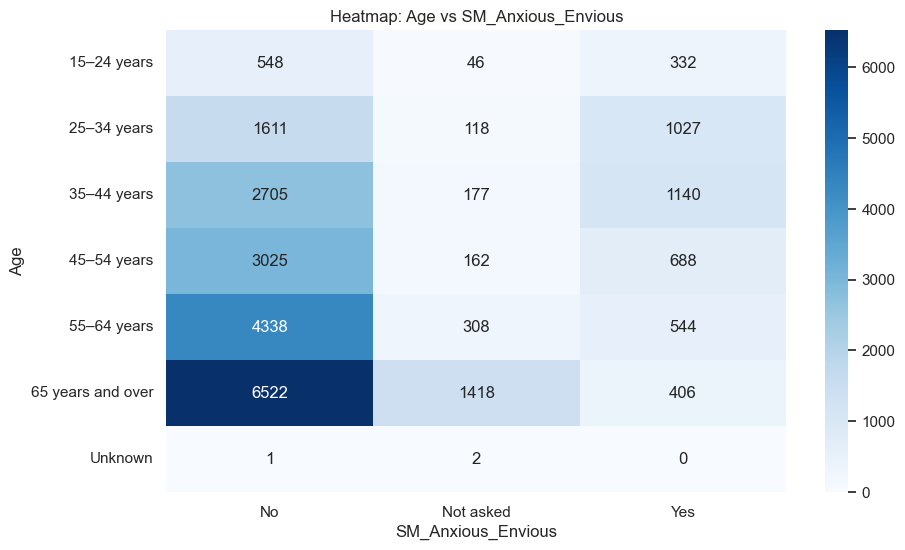

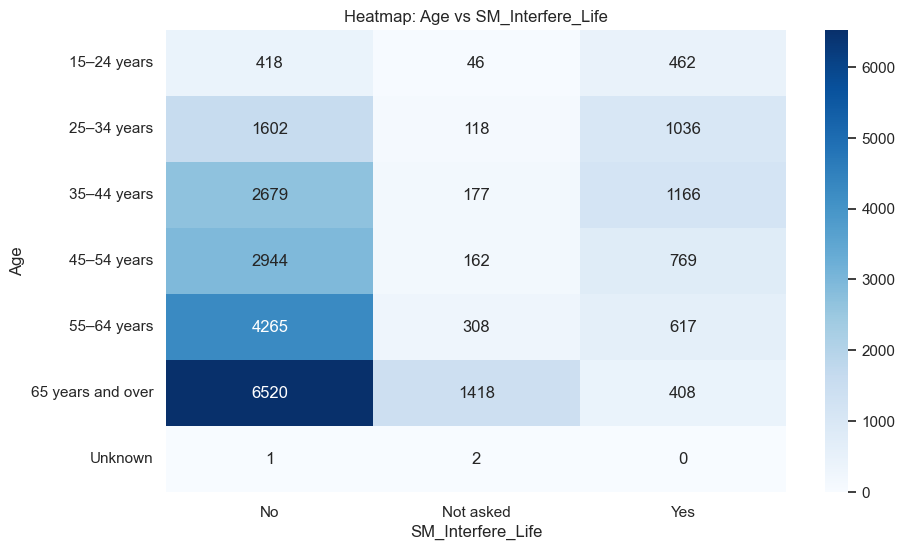

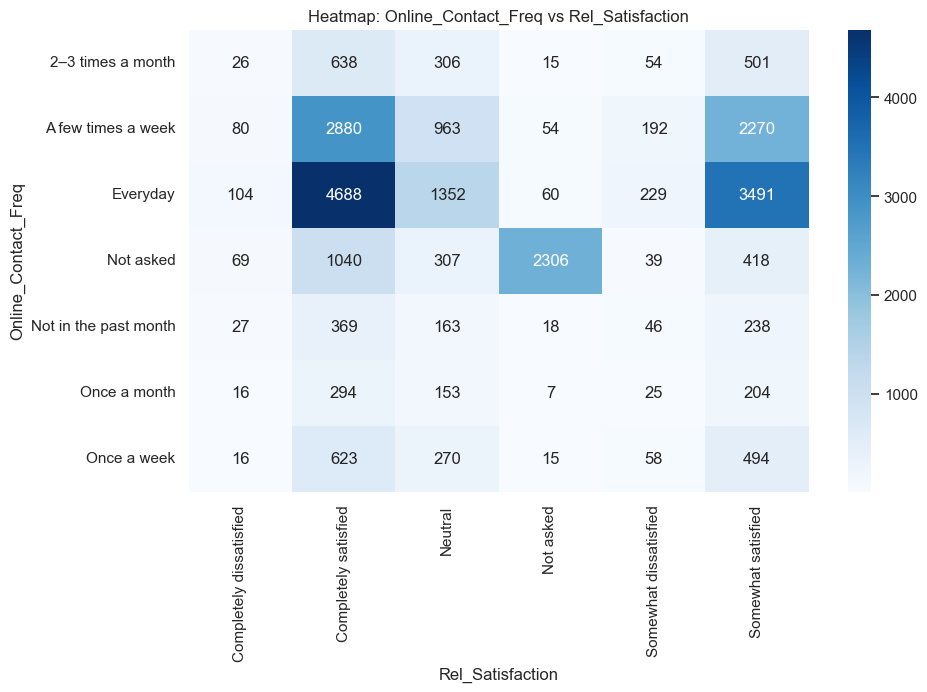

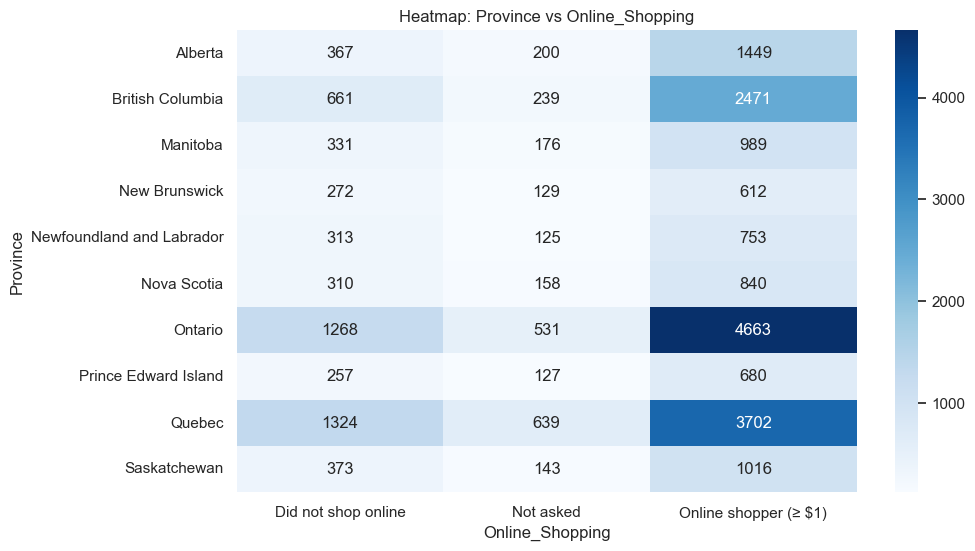

In [39]:
def plot_categorical_heatmap(col1, col2):
    cross = pd.crosstab(cius_16[col1], cius_16[col2])
    plt.figure(figsize=(10,6))
    sns.heatmap(cross, cmap="Blues", annot=True, fmt="d")
    plt.title(f"Heatmap: {col1} vs {col2}")
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()


plot_categorical_heatmap("Age", "SM_Anxious_Envious")
plot_categorical_heatmap("Age", "SM_Interfere_Life")
plot_categorical_heatmap("Online_Contact_Freq", "Rel_Satisfaction")
plot_categorical_heatmap("Province", "Online_Shopping")


`Heatmap 1: Age vs SM_Anxious_Envious`
- Shows how many users in each age group said:
    - Yes ("felt anxious/depressed") 
    - No
    - Not asked


- Younger groups have more Yes responses (common trend).
- Older groups show more No.

`Heatmap 2: Age vs SM_Interfere_Life`
- Shows how social media interferes with life based on age.

`Heatmap 3: Online Contact Frequency vs Relationship Satisfaction`
- X-axis = Satisfaction (1–5)
- Y-axis = Frequency of contacting friends online
- People who talk online everyday have a strong cluster in completely satisfied
- -  "Not asked" remains a valid category because we filled it instead of dropping rows

`Heatmap 4: Province vs Online Shopping`
- Shows distribution of online shoppers by province.
- Highest online shopper province
- Lowest online shopper province

## BiVariate Analysis



### ` Age × Social Media Mental Health (Anxiety / Interference)`

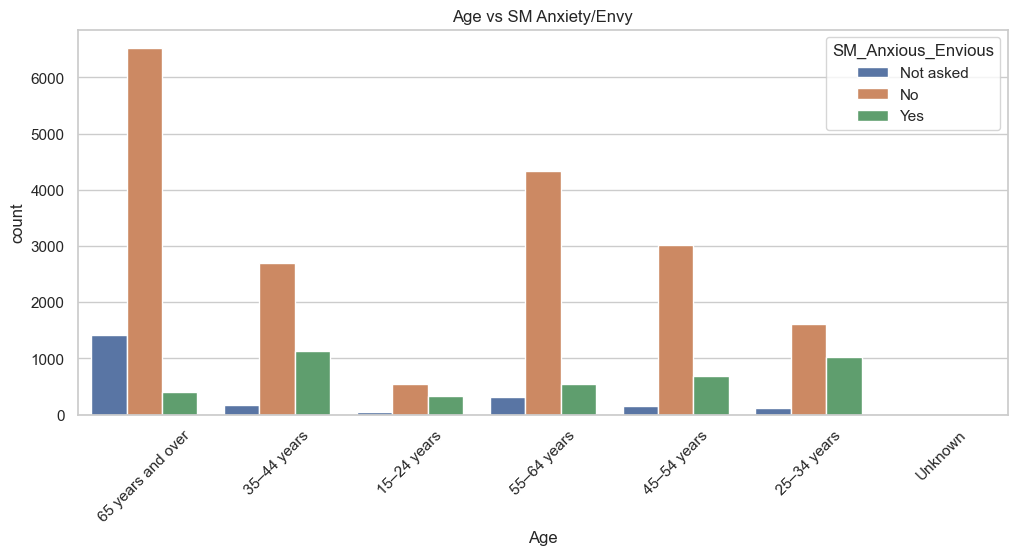

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(data=cius_16, x="Age", hue="SM_Anxious_Envious")
plt.xticks(rotation=45)
plt.title("Age vs SM Anxiety/Envy")
plt.show()



the chart shows:

A bar chart comparing age groups and whether online activities made them feel anxious, depressed, or envious.- Across all age groups, the majority reported “No” to anxiety/envious feelings.

- Younger adults (15–34 years) have higher “Yes” responses, meaning they are more emotionally affected by online activities.

- Older adults (55+ years) show a significant “Not asked” category — meaning they were not active enough online to be asked this question.

- Among those who were asked, the 25–34 and 35–44 groups show the highest rates of anxiety/envious feelings.

- Younger adults appear to be more emotionally vulnerable to effects of social media, consistent with academic literature.

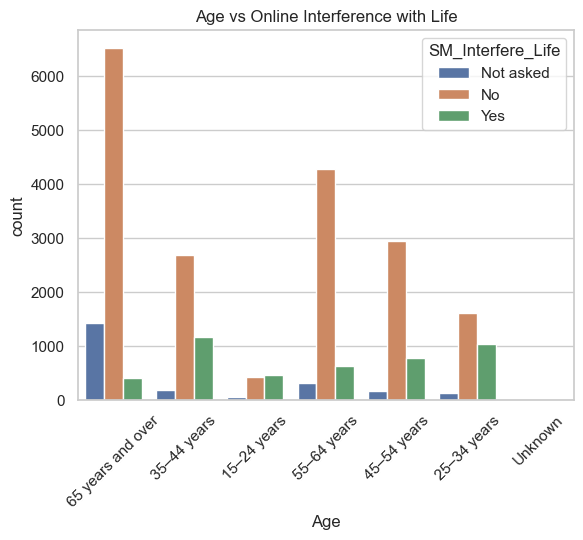

In [41]:
sns.countplot(data=cius_16, x="Age", hue="SM_Interfere_Life")
plt.xticks(rotation=45)
plt.title("Age vs Online Interference with Life")
plt.show()


The chart shows:

- How often online activities interfered with daily life (sleep, routine, responsibilities).

- Again, most respondents answered “No” — indicating limited or no interference.

- A large portion of older adults appear as “Not asked” due to CIUS skip logic — they may not use digital platforms enough for the question to apply.

- Digital interference with everyday life is primarily a Adult issue, reflecting heavier online engagement.

### `Age × Online Contact Frequency`


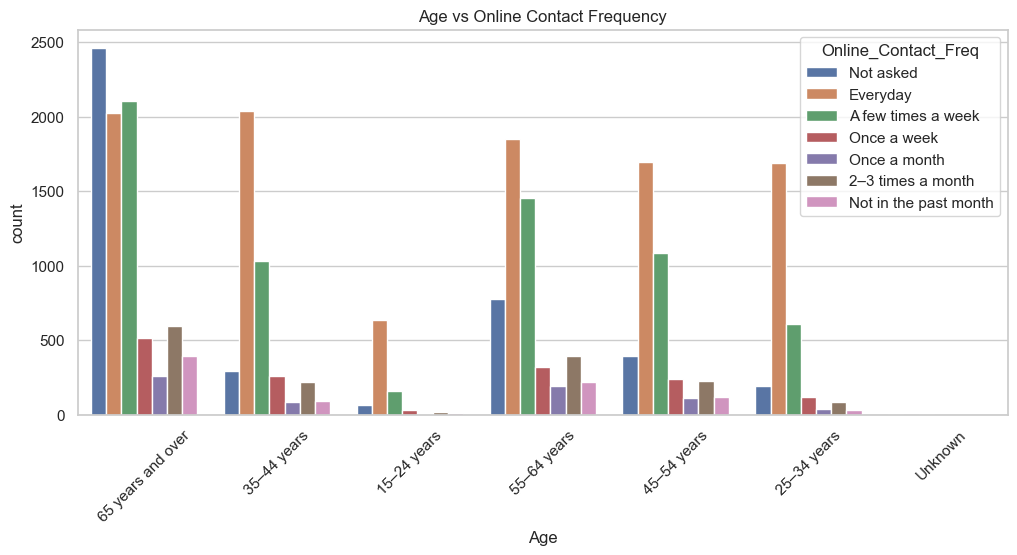

In [42]:
plt.figure(figsize=(12,5))
sns.countplot(data=cius_16, x="Age", hue="Online_Contact_Freq")
plt.xticks(rotation=45)
plt.title("Age vs Online Contact Frequency")
plt.show()


the chart shows:

How often people use digital tools (social media, messaging) to communicate with friends.


- Everyday digital communication is most common among:

- 25–34 years

- 35–44 years

- Older adults (65+) show high “Not asked” responses (due to less internet use).

- Young adults (15–24) show a mix: some daily use, others weekly/monthly communication.

- Digital communication is most frequent among working-age adults (25–44), aligning with social and work demands.

### `Online Contact Frequency × Relationship Satisfaction`  


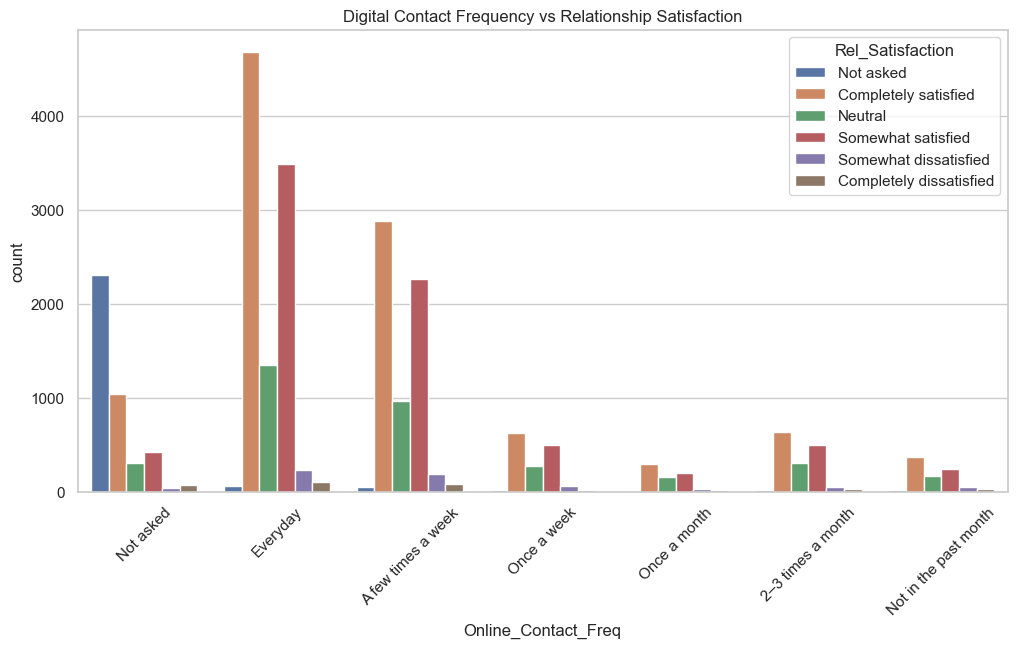

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(data=cius_16, x="Online_Contact_Freq", hue="Rel_Satisfaction")
plt.xticks(rotation=45)
plt.title("Digital Contact Frequency vs Relationship Satisfaction")
plt.show()


The chart shows:

Whether online communication frequency is linked to satisfaction with relationships.

- Everyday digital contact is strongly associated with:
- Completely satisfied
- Somewhat satisfied
- People who are less satisfied tend to interact digitally less often.
- “Not asked” appears because some respondents do not use online communication tools.
- More frequent digital communication correlates with higher relationship satisfaction — suggesting digital contact supports social bonding.

### `SM_Interfere_Rel × SM_Anxious_Envious`

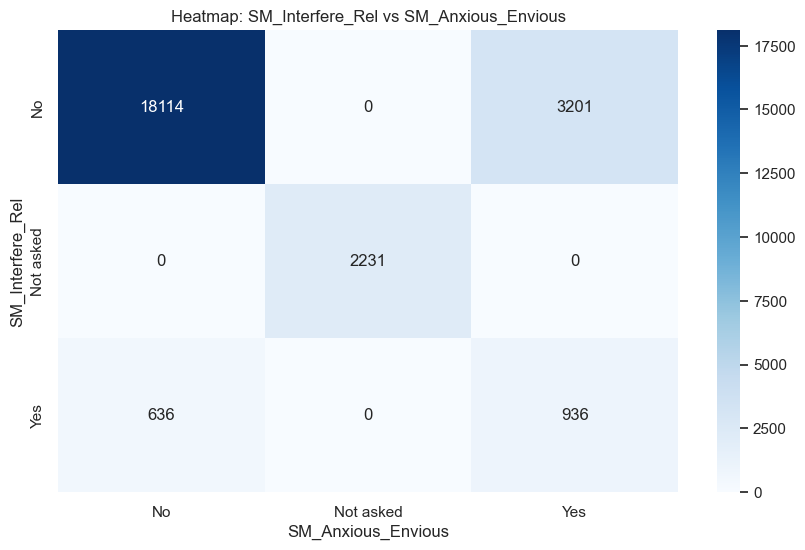

In [44]:
plot_categorical_heatmap("SM_Interfere_Rel", "SM_Anxious_Envious")


The chart shows:
Relationship between online interference with relationships and feeling anxious/depressed/envious.

- Most respondents fall under No × No — meaning:
- Online use did not interfere with relationships
- They did not feel anxious or envious
- People who experience interference in relationships also have a higher tendency to report anxiety/envious feelings.
- “Not asked” category is large for both variables (due to skip logic).
- Where online activities interfere with relationships, emotional impacts (anxiety/envy) are more likely.


### `Province × Online Shopping`

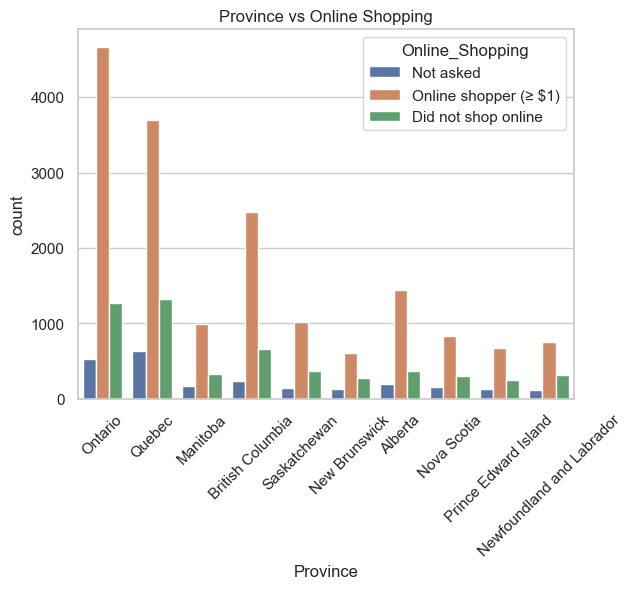

In [45]:
sns.countplot(data=cius_16, x="Province", hue="Online_Shopping")
plt.xticks(rotation=45)
plt.title("Province vs Online Shopping")
plt.show()


The chart shows:

How online shopping behavior varies by province.

- Ontario and Quebec have the highest numbers of online shoppers.
- Provinces with smaller populations (e.g., PEI, NL) naturally show lower counts.
- The “Not asked” category is minimal because this variable applies to most respondents.
- Online shopping usage is largely driven by population size and digital adoption, with Ontario and Quebec consistently leading.

### `Province × Any Social Media Mental-Health variable`

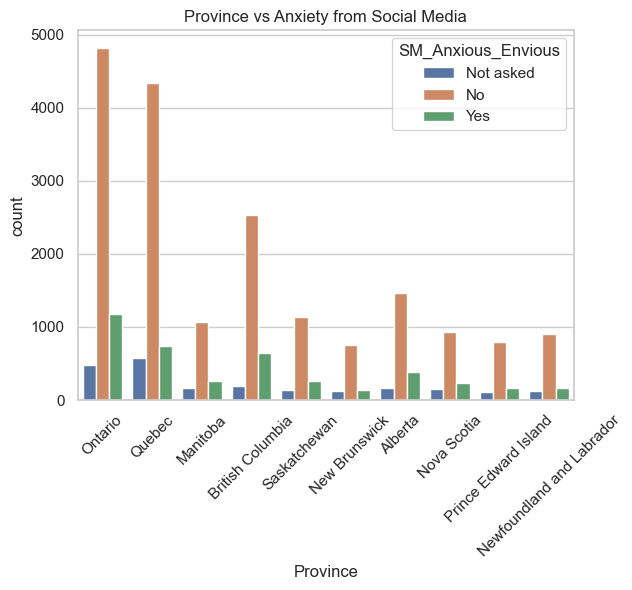

In [46]:
sns.countplot(data=cius_16, x="Province", hue="SM_Anxious_Envious")
plt.xticks(rotation=45)
plt.title("Province vs Anxiety from Social Media")
plt.show()


The chart shows:

How anxiety/envious feelings from online use vary by province.

- Ontario and Quebec have the highest counts — again due to population size.
- Rates of "Yes" appear fairly evenly distributed by population.
- Smaller provinces show fewer cases but similar proportions.
- “Not asked” is present because many respondents do not engage in the online activities needed to receive this question.
- Emotional responses to online activity appear uniform across provinces, with no province showing extreme differences.

## Our Baseline model will predict : Social media usage intensity

In [70]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib



In [71]:
cius_on = cius_16[cius_16["Province"] == "Ontario"].copy()
print("Ontario rows:", cius_on.shape[0])


Ontario rows: 6462


In [72]:
##Create TARGET: usage_risk

def usage_risk(freq):
    if freq == "Everyday":
        return "High"
    if freq in ["A few times a week", "Once a week"]:
        return "Moderate"
    if freq in ["2–3 times a month", "Once a month", "Not in the past month"]:
        return "Low"
    return None

cius_on["usage_risk"] = cius_on["Online_Contact_Freq"].apply(usage_risk)


In [73]:
# Drop rows with missing target
cius_model = cius_on.dropna(subset=["usage_risk"]).copy()

print("\nUsage risk distribution:")
print(cius_model["usage_risk"].value_counts())



Usage risk distribution:
usage_risk
High        2686
Moderate    1998
Low          807
Name: count, dtype: int64


In [74]:
# Feature set (X) and target (y)

X = cius_model[
    [
        "Age",
        "Gender",
        "Education",
        "Employment",
        "Income_Group",
        "Household_Type",
        "Online_Shopping",
        "SM_Interfere_Rel",
        "SM_Interfere_Life",
        "SM_Anxious_Envious"
    ]
]

y = cius_model["usage_risk"]


In [75]:
# Train / test split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)



In [76]:
# Preprocessing + Model

categorical_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("clf", LogisticRegression(
            max_iter=2000,
            multi_class="multinomial"
        ))
    ]
)

model.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Age', 'Gender', 'Education',
                                                   'Employment', 'Income_Group',
                                                   'Household_Type',
                                                   'Online_Shopping',
                                                   'SM_Interfere_Rel',
                                                   'SM_Interfere_Life',
                                                   'SM_Anxious_Envious'])])),
                ('clf',
                 LogisticRegression(max_iter=2000, multi_class='multinomial'))])

In [77]:
# Evaluation (BASELINE RESULTS)

y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=["Low", "Moderate", "High"]))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5013648771610555

Confusion Matrix:
[[  0  84  77]
 [  2 152 246]
 [  0 139 399]]

Classification Report:
              precision    recall  f1-score   support

        High       0.55      0.74      0.63       538
         Low       0.00      0.00      0.00       161
    Moderate       0.41      0.38      0.39       400

    accuracy                           0.50      1099
   macro avg       0.32      0.37      0.34      1099
weighted avg       0.42      0.50      0.45      1099



In [78]:
# Save model (for Flask)
joblib.dump(model, "cius_usage_risk_baseline.pkl")
print("\nModel saved as: cius_usage_risk_baseline.pkl")


Model saved as: cius_usage_risk_baseline.pkl


We built a multinomial logistic regression baseline. The model performs well for identifying high-usage users but struggles to distinguish low-usage users, highlighting class imbalance and overlapping behavioral patterns


So instead of this we decided to go with binary classificastion

In [79]:
cius_on["high_use"] = (cius_on["Online_Contact_Freq"] == "Everyday").astype(int)

In [80]:
print("\nTarget distribution (high_use):")
print(cius_on["high_use"].value_counts())


Target distribution (high_use):
high_use
0    3776
1    2686
Name: count, dtype: int64


In [81]:
feature_cols = [
    "Age",
    "Gender",
    "Education",
    "Employment",
    "Income_Group",
    "Household_Type",
    "Online_Shopping",
    "SM_Interfere_Rel",
    "SM_Interfere_Life",
    "SM_Anxious_Envious"
]

In [82]:
df_model = cius_on.dropna(subset=feature_cols + ["high_use"]).copy()

X = df_model[feature_cols]
y = df_model["high_use"]


In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [84]:
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), feature_cols)]
)

clf = LogisticRegression(
    max_iter=2000,
    class_weight="balanced"   # <-- keep this for better minority handling
)

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", clf)
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Age', 'Gender', 'Education',
                                                   'Employment', 'Income_Group',
                                                   'Household_Type',
                                                   'Online_Shopping',
                                                   'SM_Interfere_Rel',
                                                   'SM_Interfere_Life',
                                                   'SM_Anxious_Envious'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=2000))])

In [85]:
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix [ [TN FP], [FN TP] ]:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=["Not-High", "High"]))



Accuracy: 0.6334106728538283

Confusion matrix [ [TN FP], [FN TP] ]:
[[475 281]
 [193 344]]

Classification report:
              precision    recall  f1-score   support

    Not-High       0.71      0.63      0.67       756
        High       0.55      0.64      0.59       537

    accuracy                           0.63      1293
   macro avg       0.63      0.63      0.63      1293
weighted avg       0.64      0.63      0.64      1293



In [86]:
joblib.dump(model, "cius_highuse_binary_baseline.pkl")
print("\nSaved: cius_highuse_binary_baseline.pkl")


Saved: cius_highuse_binary_baseline.pkl


The binary logistic regression baseline achieves 63% accuracy with balanced recall across high and non-high social media users, demonstrating that usage intensity is predictable from demographic and behavioral features.
